In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import datetime 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib.figure import Figure
from dash import Dash, dcc, html, Input, Output
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
#taking a peek at the data.
df = pd.read_csv(r'D:\Code\SQL\Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
# searching for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Timestamp - 0%
Choose your gender - 0%
Age - 1%
What is your course? - 0%
Your current year of Study - 0%
What is your CGPA? - 0%
Marital status - 0%
Do you have Depression? - 0%
Do you have Anxiety? - 0%
Do you have Panic attack? - 0%
Did you seek any specialist for a treatment? - 0%


In [6]:
#eliminating null values i.e "age" column
df.dropna(axis=0, inplace = True)

In [7]:
#confiming elimination of null values
df.isnull().sum()  #-- all null values have been eliminated 

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
#converting timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.date

In [9]:
##changing age to int for calculations
df['Age'] = df['Age'].astype('int64')

In [10]:
# Renaming columns
df.rename(columns={'What is your course?': 'course', 'Choose your gender':'gender', 'What is your CGPA?':'CGPA',
'Age':'age', 'Did you seek any specialist for a treatment?': 'treatment', 'Do you have Depression?': 'depression', 'Do you have Anxiety?':'anxiety',
'Do you have Panic attack?':'panic attacks', "Your current year of Study":'year of study'}, inplace=True)

In [11]:
df.head()

,Timestamp,gender,age,course,year of study,CGPA,Marital status,depression,anxiety,panic attacks,treatment
0,2020-08-07,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07,Male,21,Islamic Education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-08-07,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-08-07,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [12]:
#calculating number of students per course
course_df = df.groupby(["course"])["course"].agg(["count"]).reset_index()
course_df.columns = ['course', "count"]
print('course count')
course_df.sort_values(["count"], ascending=False)

course count


,course,count
2,BCS,18
16,Engineering,17
4,BIT,9
26,KOE,6
6,Biomedical science,4
15,Engine,3
3,BENL,3
35,Psychology,3
34,Pendidikan Islam,3
28,Laws,3


In [13]:
#Visaulization of number of students per course
c_df = px.bar(course_df, x= 'course', y = 'count', color='course', labels = {'course':'Course', 'count': 'Number of Students'},
title = 'Total of Students per Course')
c_df.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
c_df.show()
# BCS is the most opted course in the dataset, followed by Engineering and BIT.

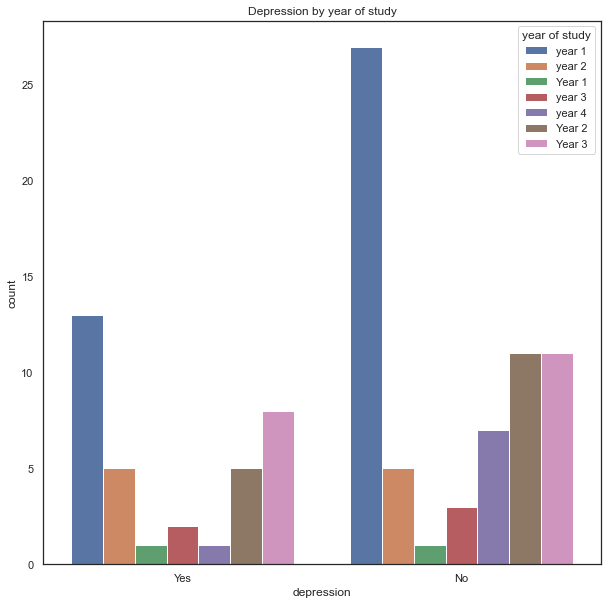

In [14]:
#calculating Depression rate by Year of study
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
dy = sns.countplot(x="depression", hue="year of study", data = df)
plt.title("Depression by year of study")
plt.show()

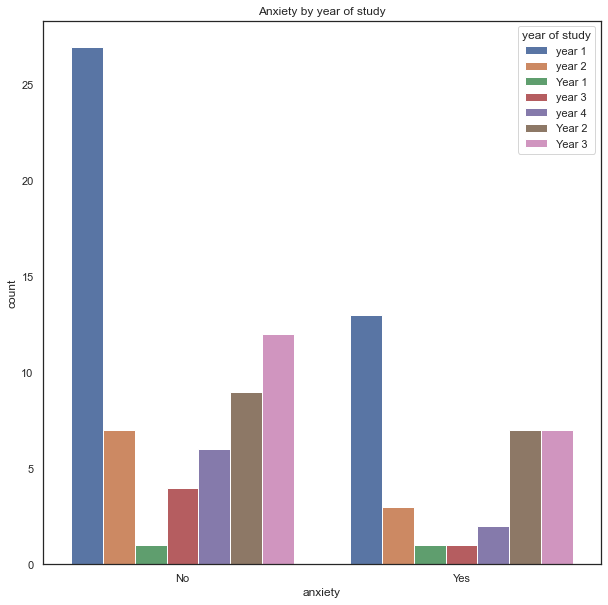

In [15]:
#calculating Anxiety rate by Year of study
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
ay = sns.countplot(x="anxiety", hue="year of study", data=df)
plt.title("Anxiety by year of study")
plt.show()

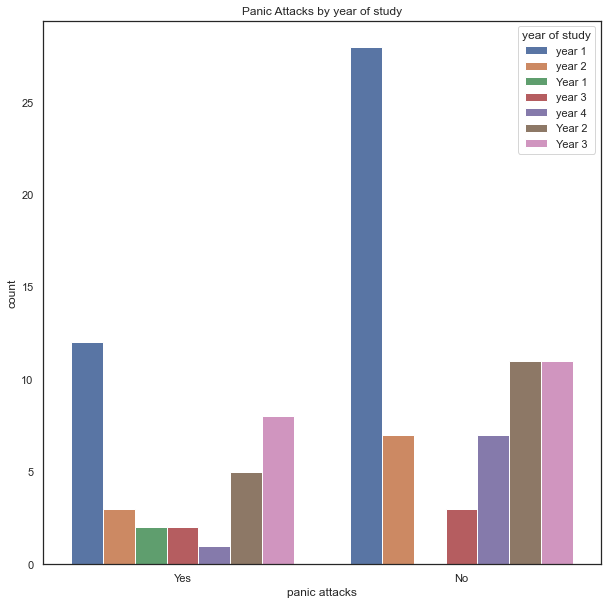

In [16]:
#calculating Panic Attacks rate by Year of study
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
py = sns.countplot(x="panic attacks", hue="year of study", data=df)
plt.title("Panic Attacks by year of study")
plt.show()

In [17]:
#analysing the relationship between CGPA and Depression. 
import plotly.express as px
d_df = px.box(df, x="gender", y=df['CGPA'].sort_values(ascending=True), color=df["depression"], labels = {'CGPA':'CGPA'},
title = 'CGPA and Depression')
d_df.show()
#Depression has small to none impat on CGPA as seen in this illustration 

In [18]:
#analysing the relationship between CGPA and Depression. 
d_df = px.violin(df, x="gender", y=df['CGPA'].sort_values(ascending=True), color=df["anxiety"], labels = {'CGPA':'CGPA'},
title = 'CGPA and Anxiety')
d_df.show()

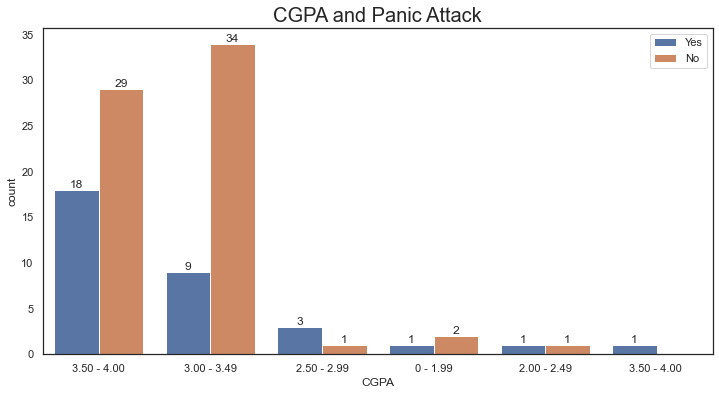

In [19]:
# The relationship between CGPA and Panic Attacks
fig = plt.figure(figsize=(12, 6))
p_df = sns.countplot(df['CGPA'], order = df['CGPA'].value_counts(normalize=True).index, hue = df['panic attacks'])
p_df.bar_label(p_df.containers[0])
p_df.bar_label(p_df.containers[1])
plt.title("CGPA and Panic Attack",size=20)
plt.legend(loc='upper right')
plt.show()

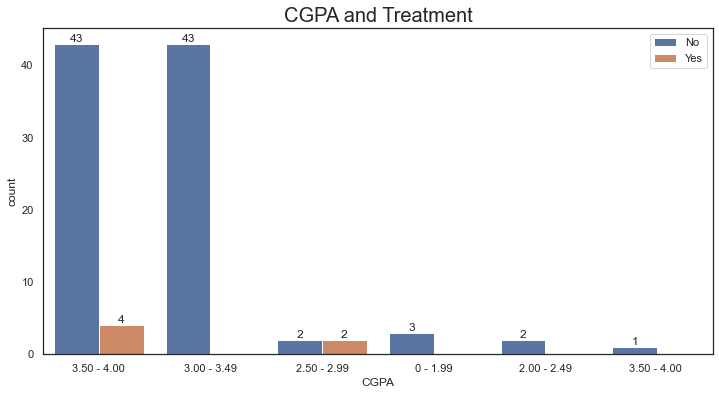

In [20]:
# The relationship between CGPA and Treatment
fig = plt.figure(figsize=(12, 6))
t_df = sns.countplot(df['CGPA'], order = df['CGPA'].value_counts(normalize=True).index, hue = df['treatment'])
t_df.bar_label(t_df.containers[0])
t_df.bar_label(t_df.containers[1])
plt.title("CGPA and Treatment",size=20)
plt.legend(loc='upper right')
plt.show()

In [21]:
# Considering just the above plots, mental health has only a little to no effect on the CGPA as per the dataset. 

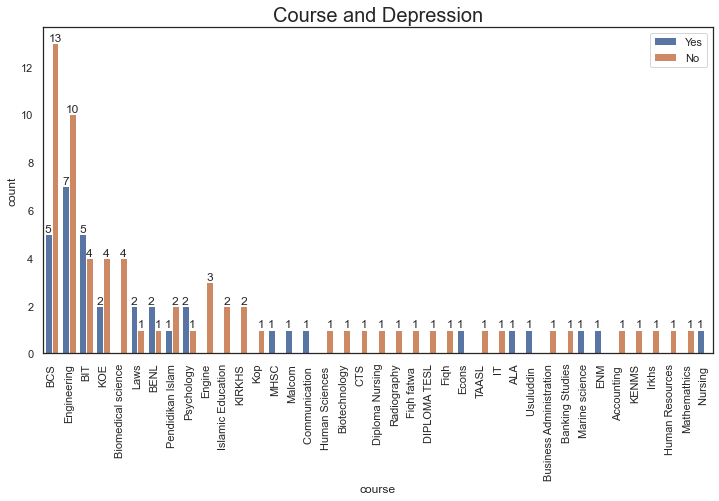

In [22]:
fig = plt.figure(figsize=(12, 6))
dc_df = sns.countplot(df['course'], order=df['course'].value_counts(normalize=True).index, hue=df['depression'])
dc_df.bar_label(dc_df.containers[0])
dc_df.bar_label(dc_df.containers[1])
plt.title("Course and Depression", size=20)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

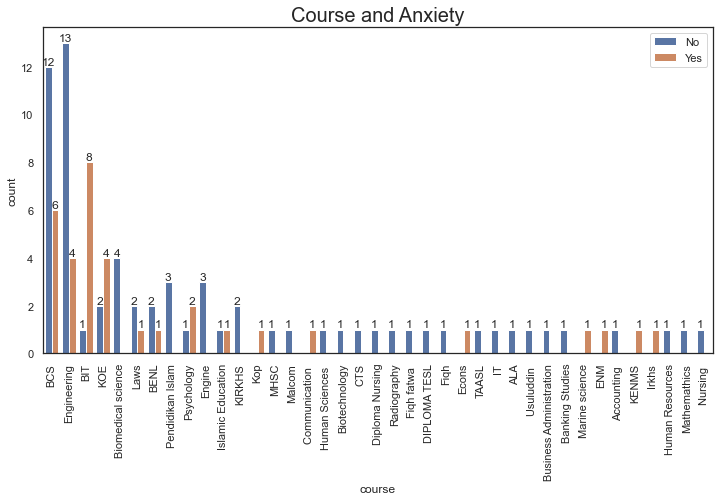

In [23]:
fig = plt.figure(figsize=(12, 6))
ac_df = sns.countplot(df['course'], order=df['course'].value_counts(normalize=True).index, hue=df['anxiety'])
ac_df.bar_label(ac_df.containers[0])
ac_df.bar_label(ac_df.containers[1])
plt.title("Course and Anxiety", size=20)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

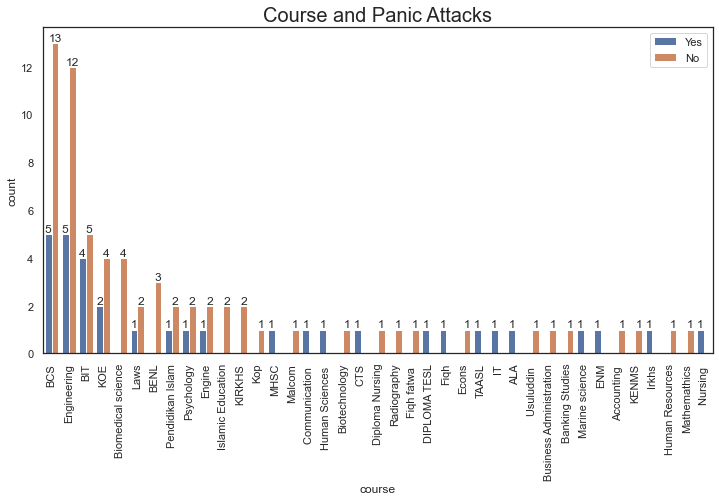

In [24]:
fig = plt.figure(figsize=(12, 6))
pc_df = sns.countplot(df['course'], order=df['course'].value_counts(normalize=True).index, hue=df['panic attacks'])
pc_df.bar_label(pc_df.containers[0])
pc_df.bar_label(pc_df.containers[1])
plt.title("Course and Panic Attacks", size=20)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Considering only the above plots, the datset confirms a positive correlation between the course and mental health highly seen in
# BCS as the most opted course in the dataset, followed by Engineering and BIT.
# However, due to the size of the dataset and insufficient information, its quite impossible to make a final conclusion if 
# the course has a strong correlation towards mental health.